In [379]:
#calculating the dark rate on the csvs and applying thresholds
import pandas as pd
import numpy as np####
import matplotlib.pyplot as plt
df = pd.read_csv('PMT7_Processed_moresig/020226_darkrate_1800_10000_1_off_processed_threshold27.csv')

In [380]:
"""
CSV has columns 0 to 12:
(index column)
column 0: baseline
column 1: sd_baseline
column 2: amplitude
column 3: peak_time
column 4: FWHM
column 5: t1_of_FWHM
column 6: t2_of_FWHM
column 7: time_above_3sigma
column 8: first_3sigma_crossing
column 9: second_3sigma_crossing
column 10: integral_pC
column 11: peaks_over_15sigma_threshold
column 12: event_timestamps

"""

'\nCSV has columns 0 to 12:\n(index column)\ncolumn 0: baseline\ncolumn 1: sd_baseline\ncolumn 2: amplitude\ncolumn 3: peak_time\ncolumn 4: FWHM\ncolumn 5: t1_of_FWHM\ncolumn 6: t2_of_FWHM\ncolumn 7: time_above_3sigma\ncolumn 8: first_3sigma_crossing\ncolumn 9: second_3sigma_crossing\ncolumn 10: integral_pC\ncolumn 11: peaks_over_15sigma_threshold\ncolumn 12: event_timestamps\n\n'

for the window: 1e-09 there are 753 events
for the window: 1.275766016713092e-09 there are 1536 events
for the window: 1.5515320334261838e-09 there are 2823 events
for the window: 1.8272980501392758e-09 there are 4495 events
for the window: 2.1030640668523678e-09 there are 6087 events
for the window: 2.3788300835654596e-09 there are 7330 events
for the window: 2.6545961002785513e-09 there are 7934 events
for the window: 2.930362116991644e-09 there are 8213 events
for the window: 3.2061281337047357e-09 there are 8352 events
for the window: 3.4818941504178275e-09 there are 8463 events
for the window: 3.757660167130919e-09 there are 8570 events
for the window: 4.033426183844011e-09 there are 8660 events
for the window: 4.309192200557103e-09 there are 8746 events
for the window: 4.584958217270195e-09 there are 8779 events
for the window: 4.860724233983287e-09 there are 8805 events
for the window: 5.136490250696379e-09 there are 8826 events
for the window: 5.412256267409471e-09 there are 88

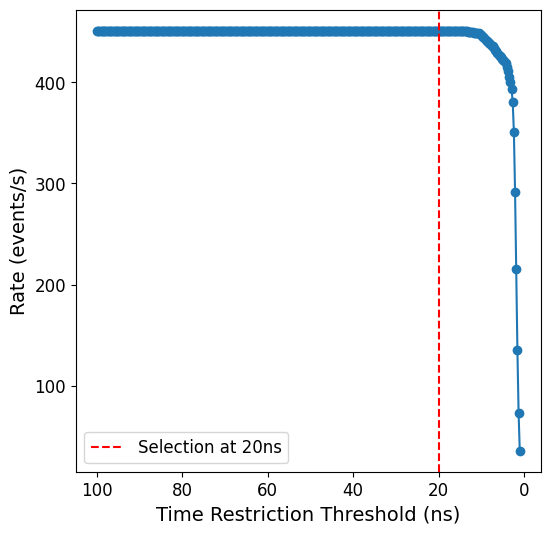

In [381]:

#apply threshold here (n*sigma), 0 to 100 sigma 
time_restrictions = np.linspace(0.1e-8, 10e-8, 360)
time_column = df['total_time_above'].dropna()
#amplitude_column = df['amplitude']
timestamp_column = df['event_timestamps']
#find the difference between the first timestamp and final timestamp
timetaken = timestamp_column.iloc[-1] - timestamp_column.iloc[0]

dark_rates = []

for window in time_restrictions:
    surviving_columns = time_column < window
    rate = np.sum(surviving_columns)/timetaken 
    dark_rates.append(rate)
    print(f'for the window: {window} there are {np.sum(surviving_columns)} events')

dark_rates = np.array(dark_rates)

#plot dark rate against applied threshold here
plt.figure(figsize=(6, 6))
plt.plot(time_restrictions*1e9, dark_rates, marker='o')
#plt.axvline(10, color = 'r', linestyle='--', label = 'Cut at 10ns')
plt.axvline(20, color = 'r', linestyle='--', label = 'Selection at 20ns')
plt.xlabel('Time Restriction Threshold (ns)', fontsize=14)
plt.ylabel('Rate (events/s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.gca().invert_xaxis() 
plt.show()